<font size="3">This notebook shows the data extraction process.</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wikipedia-math-essentials/wikivital_mathematics.json


In [3]:
with open('/kaggle/input/wikipedia-math-essentials/wikivital_mathematics.json') as f:
    data = json.load(f)

In [4]:
data.keys()

dict_keys(['edges', 'weights', 'node_ids', 'time_periods', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '

In [5]:
# keys 0 to 730 are the daily visitor of all pages (or nodes) on each day
data['0']

{'index': 0,
 'year': 2019,
 'month': 3,
 'day': 16,
 'y': [3962,
  774,
  1734,
  1016,
  2463,
  436,
  214,
  402,
  363,
  490,
  232,
  686,
  569,
  2389,
  2899,
  381,
  661,
  2672,
  457,
  278,
  747,
  725,
  16200,
  804,
  944,
  587,
  1593,
  856,
  1017,
  303,
  471,
  242,
  779,
  3302,
  1128,
  93,
  274,
  868,
  1431,
  360,
  154,
  874,
  467,
  209,
  908,
  1120,
  193,
  228,
  399,
  391,
  751,
  1127,
  873,
  1133,
  246,
  1449,
  1522,
  1148,
  380,
  503,
  579,
  1550,
  1528,
  579,
  1520,
  333,
  496,
  1578,
  344,
  452,
  1359,
  733,
  558,
  428,
  261,
  1028,
  911,
  567,
  1078,
  132,
  768,
  954,
  239,
  423,
  396,
  335,
  835,
  378,
  151,
  1281,
  251,
  633,
  392,
  1286,
  267,
  1156,
  346,
  1991,
  636,
  623,
  310,
  822,
  641,
  579,
  81,
  470,
  98,
  2486,
  679,
  1016,
  84,
  407,
  141,
  109,
  80,
  60,
  772,
  762,
  1413,
  463,
  14,
  670,
  329,
  193,
  405,
  402,
  728,
  232,
  469,
  571,
  145

In [6]:
topics = data['node_ids']
topics = sorted(topics.items(), key=lambda it: it[1])
topics

[('Mathematics', 0),
 ('Number theory', 1),
 ('Algebra', 2),
 ('Geometry', 3),
 ('Calculus', 4),
 ('Mathematical analysis', 5),
 ('Conjecture', 6),
 ('Mathematical proof', 7),
 ('Counting', 8),
 ('Shape', 9),
 ('Foundations of mathematics', 10),
 ('Axiom', 11),
 ('Applied mathematics', 12),
 ('Statistics', 13),
 ('Game theory', 14),
 ('Pure mathematics', 15),
 ('Arithmetic', 16),
 ('Pythagorean theorem', 17),
 ('Addition', 18),
 ('Subtraction', 19),
 ('Multiplication', 20),
 ('Division (mathematics)', 21),
 ('Pi', 22),
 ('Area', 23),
 ('Parabola', 24),
 ('Series (mathematics)', 25),
 ('Trigonometry', 26),
 ('Sine', 27),
 ("Gödel's incompleteness theorems", 28),
 ('Theorem', 29),
 ('Group theory', 30),
 ('Proof by contradiction', 31),
 ('Operations research', 32),
 ('Prime number', 33),
 ('Fast Fourier transform', 34),
 ('Recreational mathematics', 35),
 ('Open set', 36),
 ('Field (mathematics)', 37),
 ('Integral', 38),
 ('If and only if', 39),
 ('Axiomatic system', 40),
 ('Set theory',

In [7]:
id2topics = {v:k for k,v in data['node_ids'].items()}
# id2topics

In [8]:
# taking the nodes' names which are directed to node no. 1000
# node no. 1000 is the Bucket Sort page
TOPIC_ID = 1000
sources_id = []
sources_top = [] # sources topic
for l in data['edges']:
    if l[1]==TOPIC_ID: # edges is a tuple with two nodes, and the second one is the destination
        sources_id.append(l[0]) # the first node in the tuple l is the source page
        sources_top.append(id2topics[l[0]])

sources_top

['Computational complexity theory',
 'Analysis of algorithms',
 'Big O notation',
 'Total order',
 'Sorting algorithm',
 'Quicksort',
 'Time complexity',
 'Space complexity',
 'Array data structure',
 'Bubble sort',
 'Insertion sort',
 'Merge sort',
 'Heapsort',
 'Selection sort',
 'Shellsort',
 'Radix sort',
 'Gnome sort']

In [9]:
len(sources_top)

17

In [10]:
# get the time series of daily visitor of the Bucket Sort page
ts = np.array(None)
for a in range(731):
    visitor_in_a_day = data[str(a)]['y'][TOPIC_ID]
    ts = np.append(ts, [visitor_in_a_day])
ts = np.delete(ts, 0)

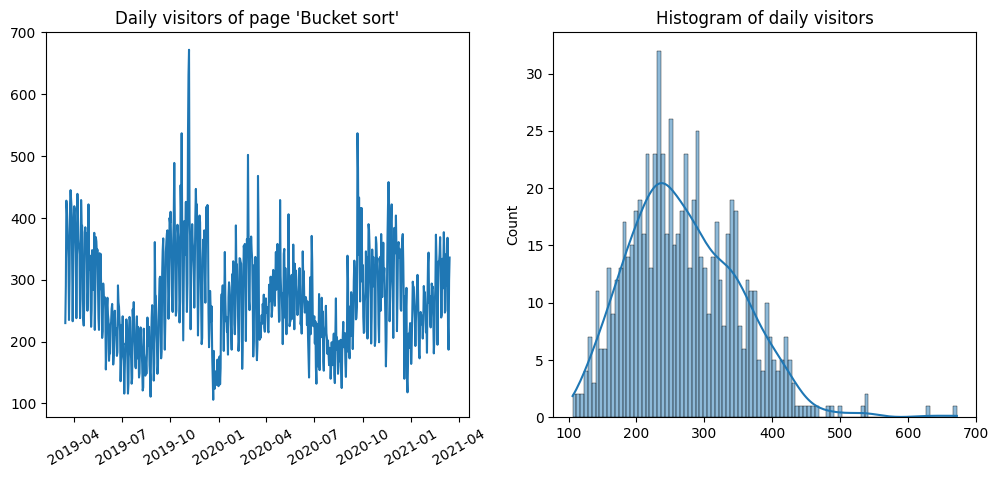

In [11]:
# a quick look at the time series
_, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].plot(pd.date_range(start='2019-03-16', end='2021-03-15'), ts)
axs[0].tick_params(axis='x', rotation=30)
axs[0].set_title(f"Daily visitors of page '{topics[TOPIC_ID][0]}'")
sns.histplot(ts, ax=axs[1], bins=100, kde=True)
axs[1].set_title("Histogram of daily visitors");

In [12]:
px.line(x=pd.date_range(start='2019-03-16', end='2021-03-15'), y=ts)

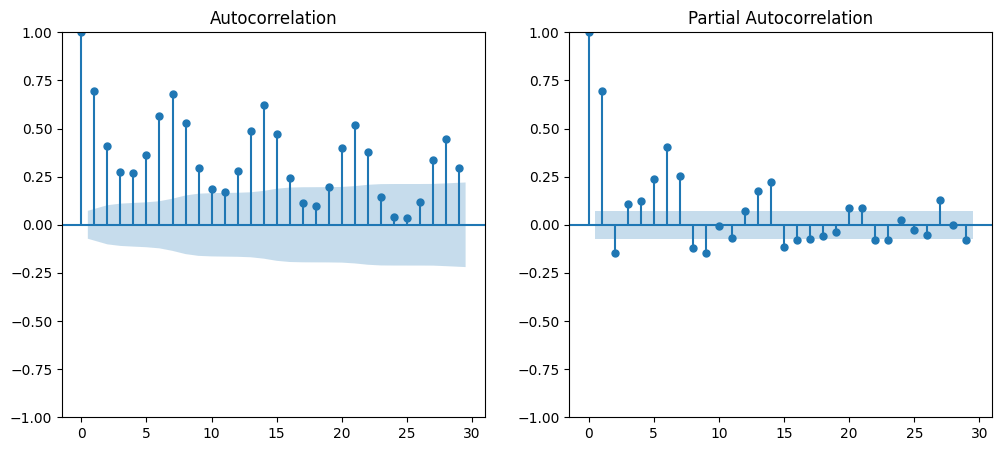

In [13]:
_, axs = plt.subplots(1,2, figsize=(12,5))

plot_acf(ts, ax=axs[0]);
plot_pacf(ts, ax=axs[1]);

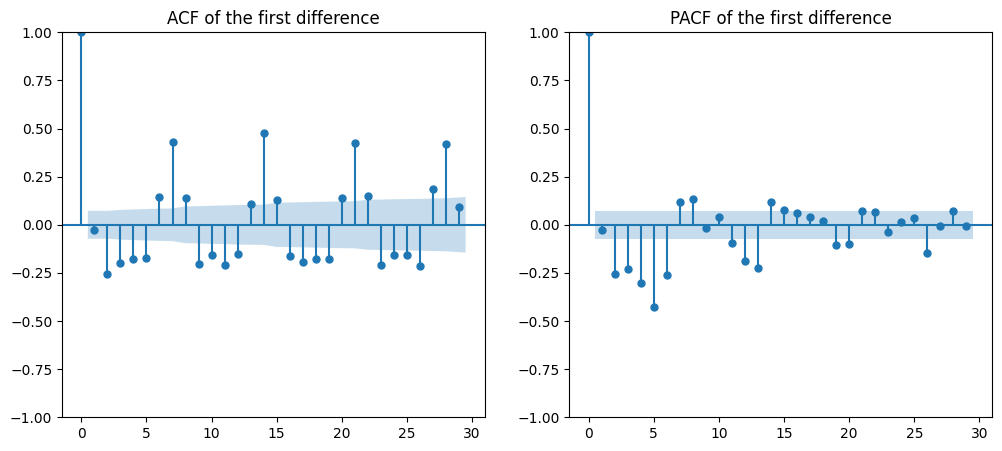

In [14]:
_, axs = plt.subplots(1,2, figsize=(12,5))
plot_acf(np.diff(ts), ax=axs[0], title='ACF of the first difference')
plot_pacf(np.diff(ts), ax=axs[1], title='PACF of the first difference');

In [15]:
print(f'The variance of the time series is {np.var(ts)} and the mean is {np.mean(ts)}')

The variance of the time series is 6502.932845024242 and the mean is 269.9165526675787


In [16]:
# taking the counts from the source topics
covariates = {k:np.array(None) for k in sources_top}

for a in range(731):
    # each day has its own entry in the data dictionary
    daily_data = data[str(a)]
    # get the daily visitor for each source topics
    for i, topic in zip(sources_id, sources_top):
        visitor_in_a_day = daily_data['y'][i]
        covariates[topic] = np.append(covariates[topic], [visitor_in_a_day])

X = pd.DataFrame(covariates)
X = X.loc[1:, :]
X.head()

,Computational complexity theory,Analysis of algorithms,Big O notation,Total order,Sorting algorithm,Quicksort,Time complexity,Space complexity,Array data structure,Bubble sort,Insertion sort,Merge sort,Heapsort,Selection sort,Shellsort,Radix sort,Gnome sort
1,391,230,1683,243,995,1391,861,40,542,896,895,895,568,527,199,402,72
2,450,281,1882,278,1132,1679,980,64,575,1072,1080,1095,718,636,227,555,63
3,645,405,2836,385,1774,2624,1273,69,864,1605,1563,1697,1001,911,303,701,87
4,665,361,2928,350,1687,2627,1349,72,986,1605,1669,1863,1126,985,304,684,66
5,578,307,2925,350,1622,2664,1246,63,843,1537,1625,1884,982,1002,301,723,74


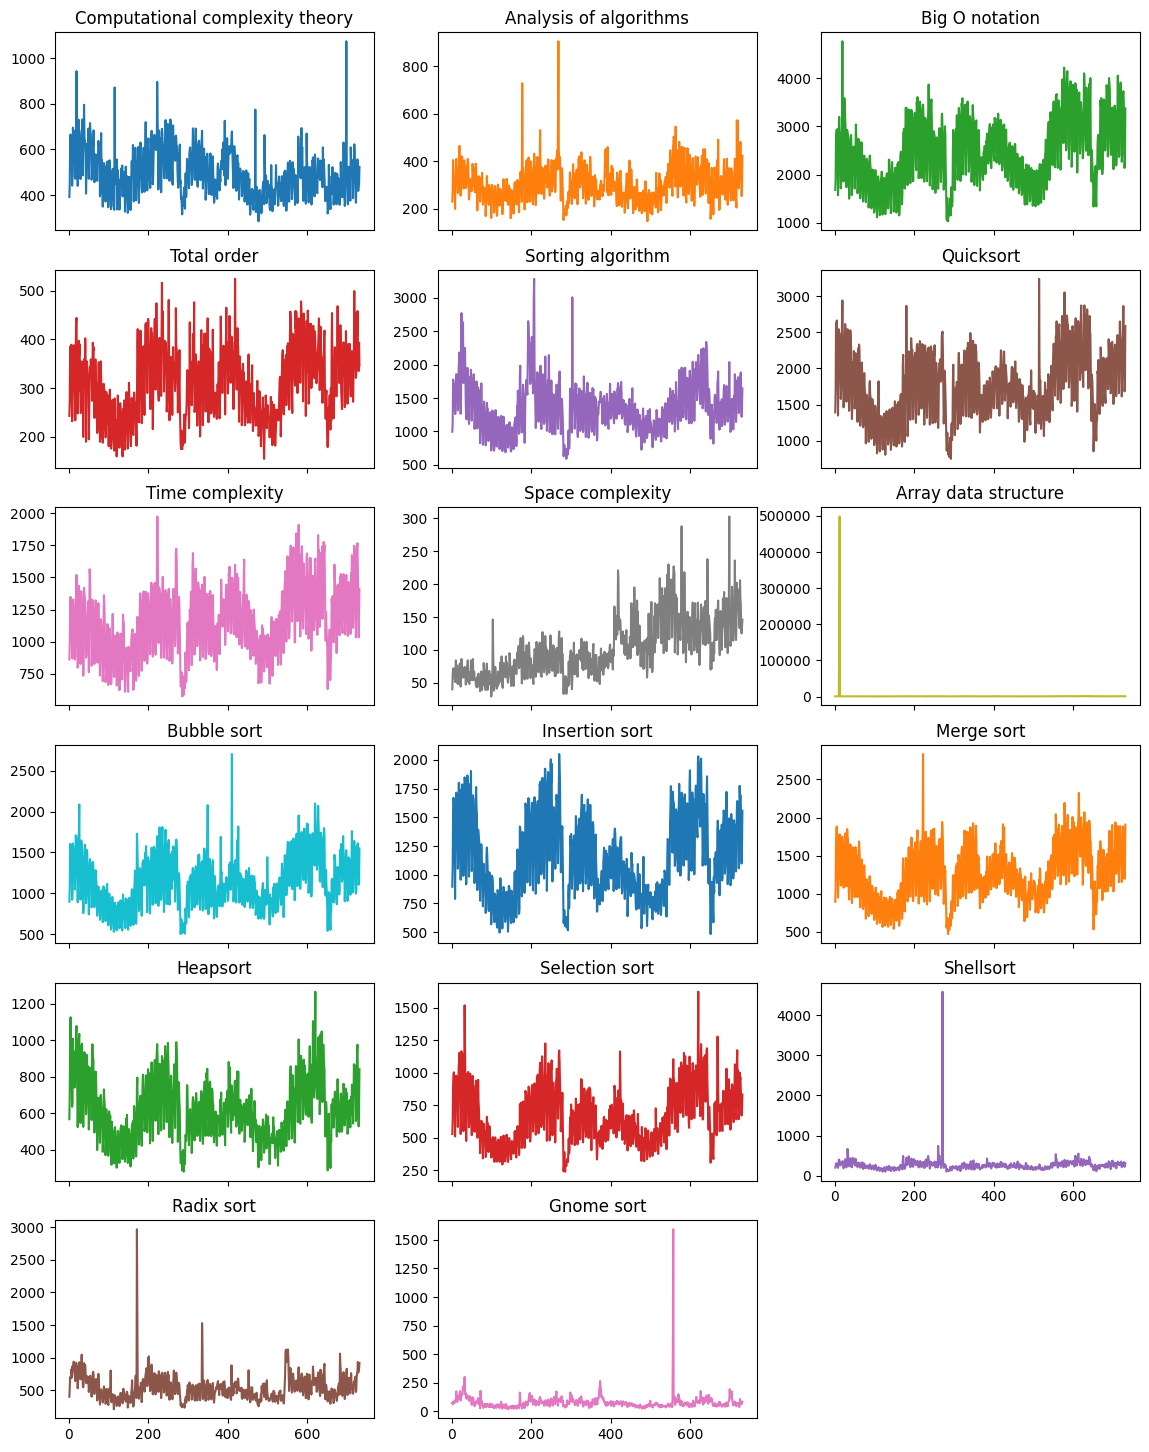

In [17]:
X.plot(subplots=True, layout=(6,3), title=X.columns.to_list(), legend=False, figsize=(14,18));

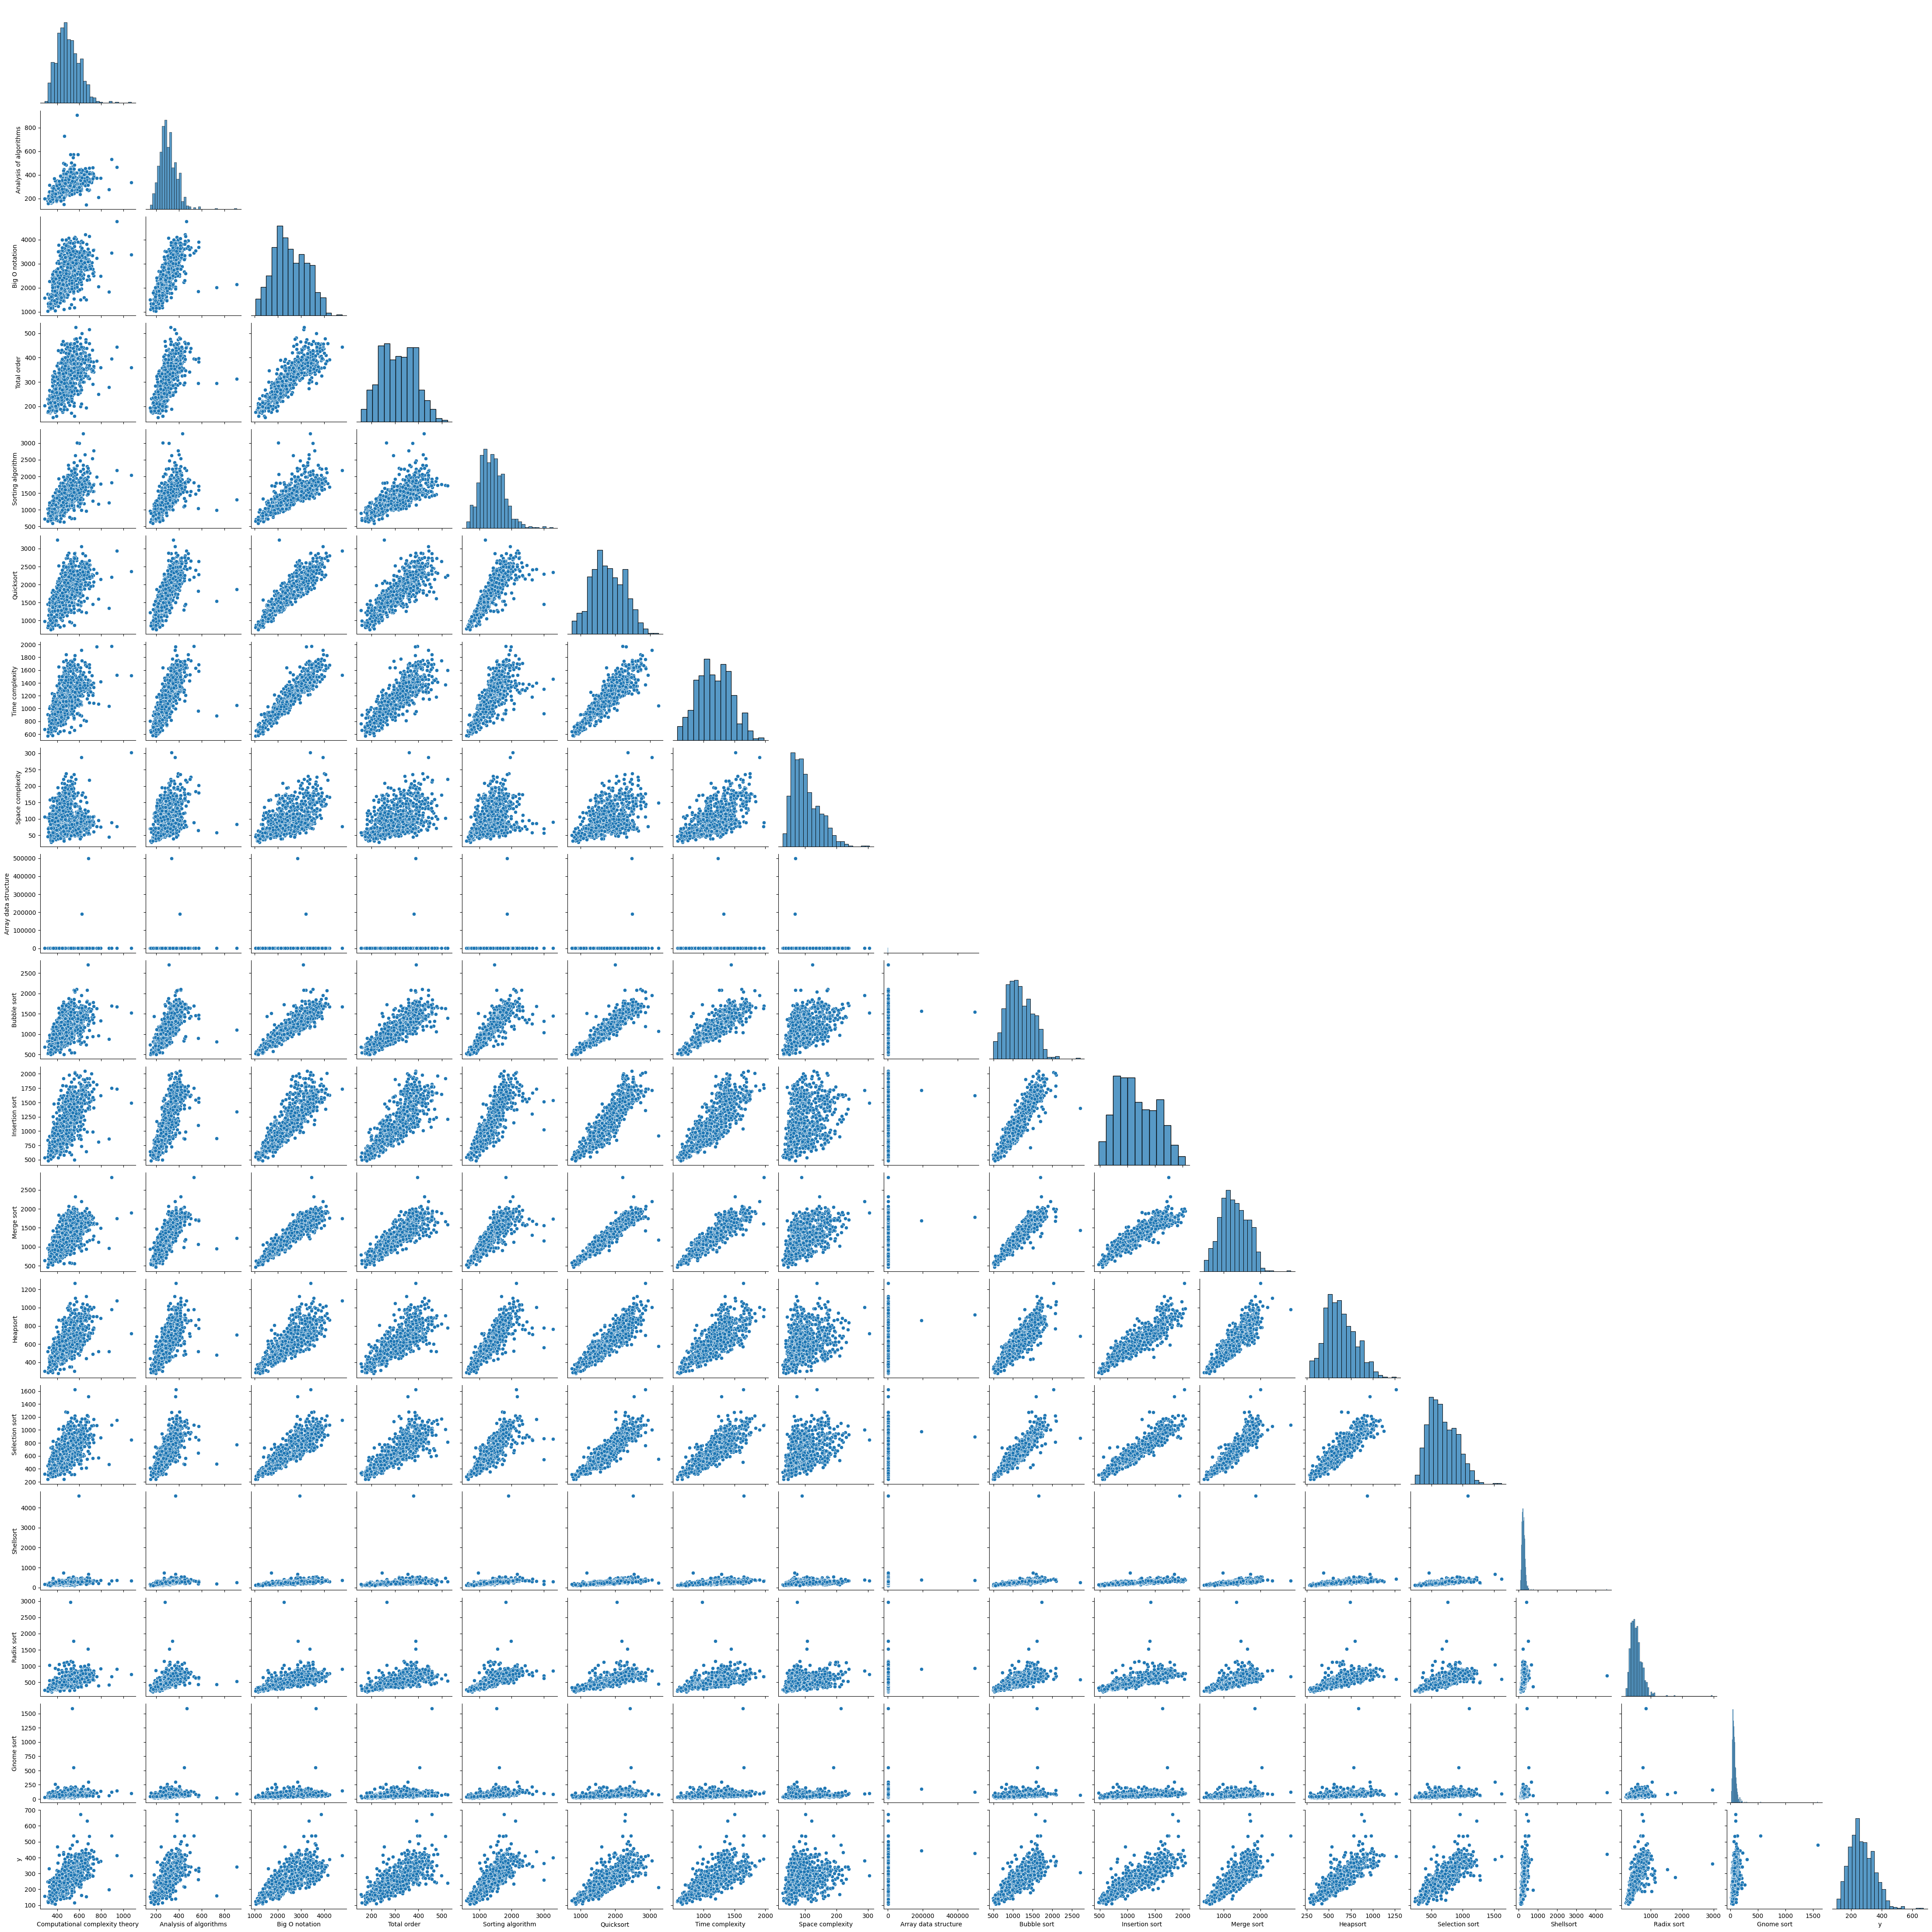

In [18]:
df_Xy = X.copy()
df_Xy['y'] = ts
sns.pairplot(df_Xy, corner=True);

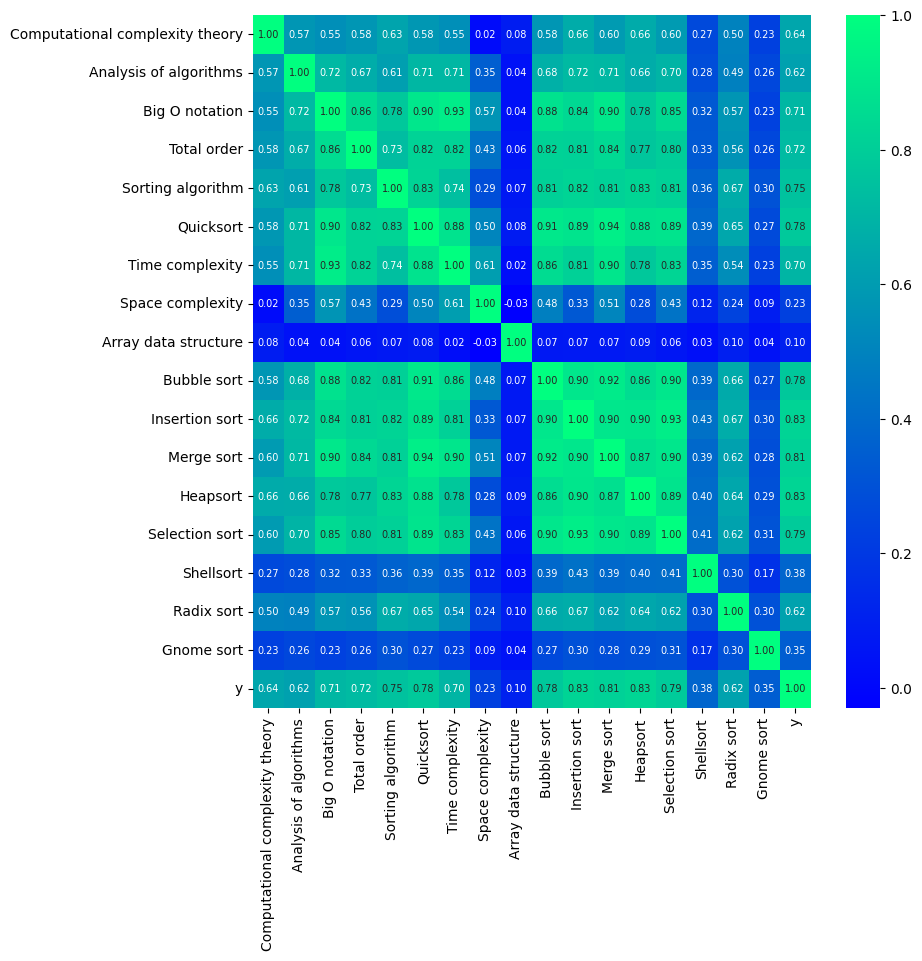

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(df_Xy.corr(), annot=True, fmt='.2f', cmap='winter', annot_kws={'fontsize':7});

In [20]:
df_Xy.to_csv('wiki_BucketSort.csv', index=False)